In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)

(112, 4)


In [2]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [5.88660714 3.05178571 3.79642857 1.22321429] 
standard deviation : [0.86741565 0.43424445 1.79264014 0.77793019] 


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
scaler.fit(X_train)

StandardScaler()

In [5]:
X_train_scaled = scaler.transform(X_train)

In [6]:
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))

mean : [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16] 
standard deviation : [1. 1. 1. 1.] 


In [7]:
X_test_scaled = scaler.transform(X_test)
print("mean test data: %s" % X_test_scaled.mean(axis=0))
print("std test data: %s" % X_test_scaled.std(axis=0))

mean test data: [-0.19692712  0.05042896 -0.08461917 -0.12117658]
std test data: [0.77268842 1.00056442 0.92175903 0.89784396]


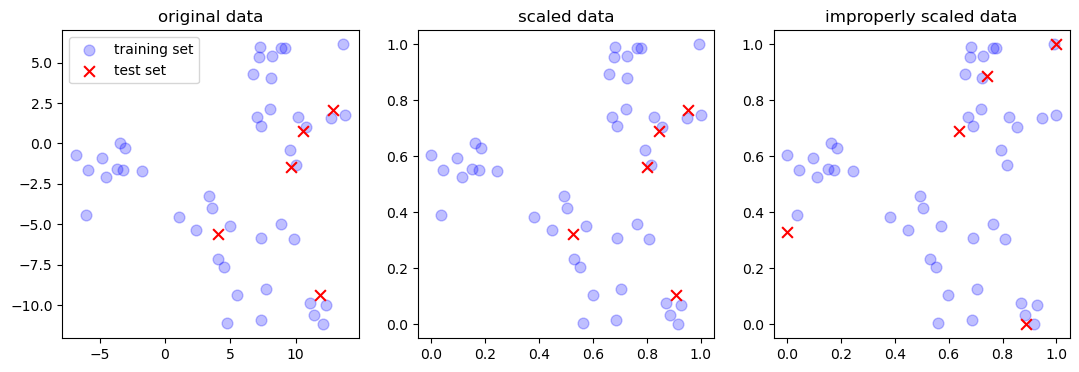

In [8]:
from figs import plot_scaling
plot_scaling.plot_relative_scaling()

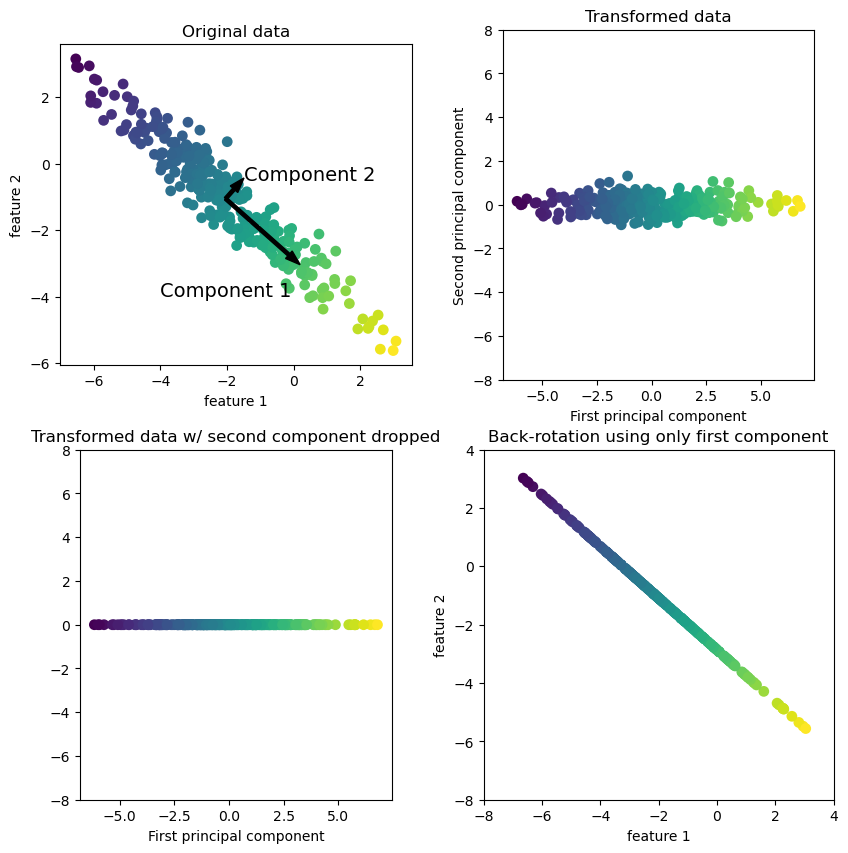

In [9]:
from figs import  plot_pca
plot_pca.plot_pca_illustration()

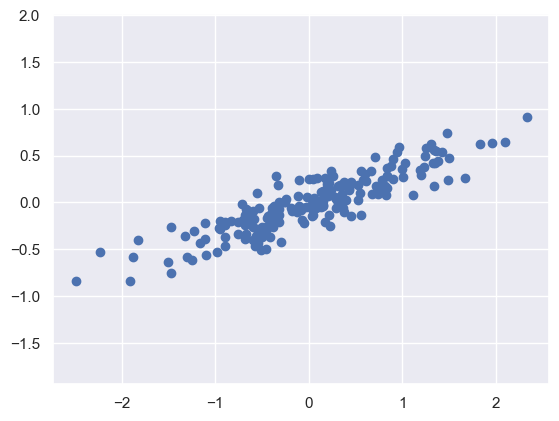

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [12]:
v1 = pca.components_[:, 0]
v2 = pca.components_[:, 1]
print(v1)
print(v2)

[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]


In [13]:
print(np.dot(v1, v2))

0.0


In [14]:
print(np.dot(v1,v2))

0.0


In [15]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

0.9999999999999999
0.9999999999999999


In [16]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

0.9999999999999999
0.9999999999999999


In [17]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


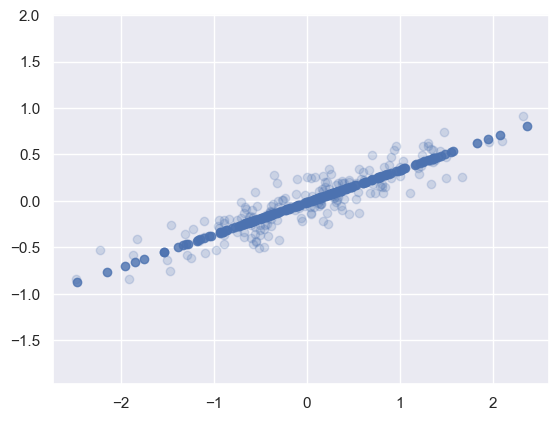

In [18]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'bo', alpha=0.8)
plt.axis('equal');

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
(200, 2)
(200, 1)


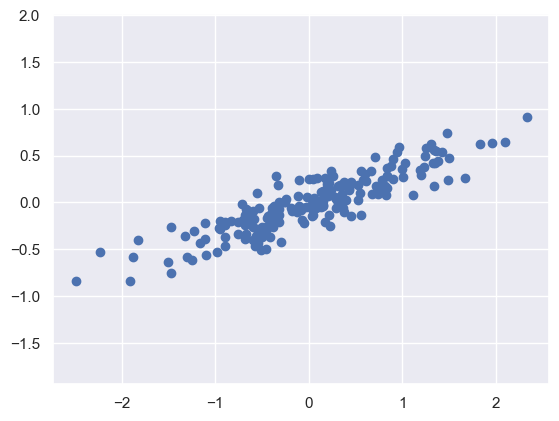

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)


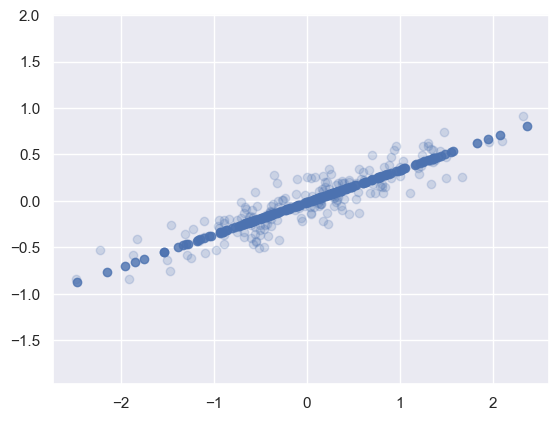

In [24]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'bo', alpha=0.8)
plt.axis('equal');

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)

(1797, 64)


In [27]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
X_proj = pca.fit_transform(X)
print(X.shape)
print(X_proj.shape)

(1797, 64)
(1797, 2)


C:\Users\Sarisa\AppData\Local\Temp\ipykernel_4884\4033352602.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


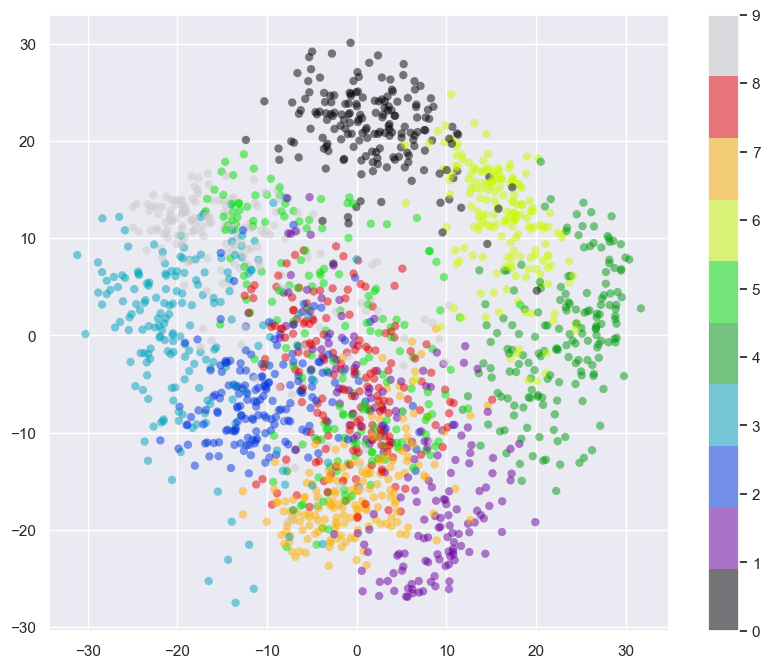

In [28]:
plt.figure(figsize=(10.0, 8.0))
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

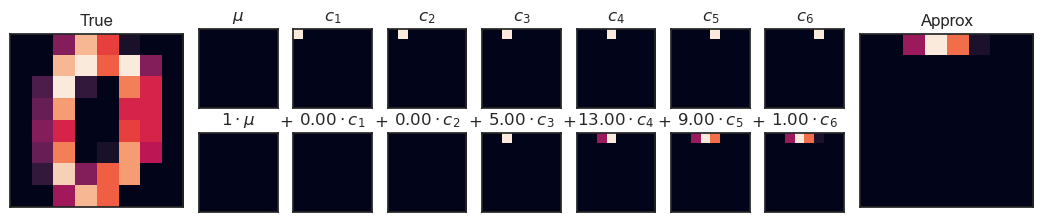

In [29]:
from figs.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

In [30]:
from figs.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

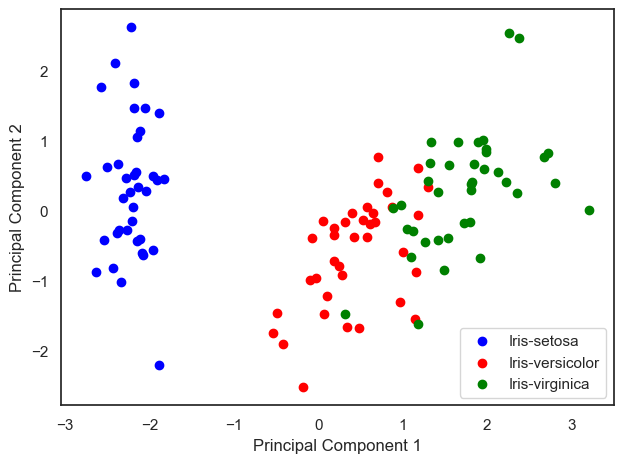

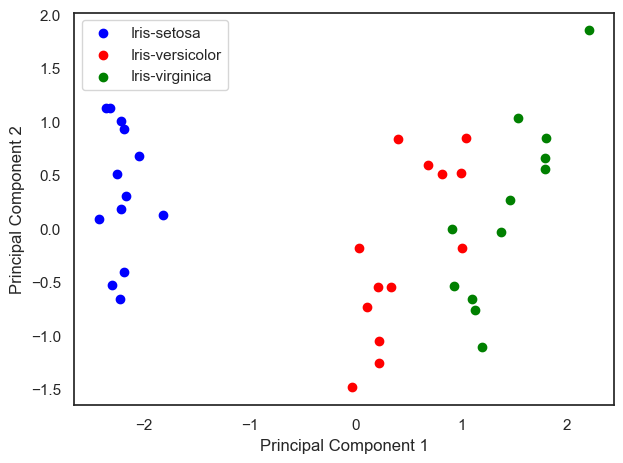

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0,
                                                    stratify=iris.target)

sc = StandardScaler()
sc.fit(X_train)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(sc.transform(X_train))
X_test_pca = pca.transform(sc.transform(X_test))

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
